<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/model_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 2.x selected.


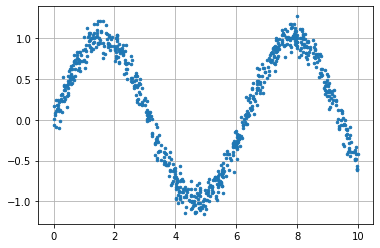

Train on 720 samples, validate on 80 samples
Epoch 1/100
720/720 [==============================] - 1s 2ms/sample - loss: 0.5474 - val_loss: 0.5179
Epoch 2/100
720/720 [==============================] - 0s 81us/sample - loss: 0.3087 - val_loss: 0.4956
Epoch 3/100
720/720 [==============================] - 0s 74us/sample - loss: 0.2634 - val_loss: 0.4829
Epoch 4/100
720/720 [==============================] - 0s 75us/sample - loss: 0.2323 - val_loss: 0.4779
Epoch 5/100
720/720 [==============================] - 0s 83us/sample - loss: 0.2184 - val_loss: 0.4735
Epoch 6/100
720/720 [==============================] - 0s 75us/sample - loss: 0.2046 - val_loss: 0.4678
Epoch 7/100
720/720 [==============================] - 0s 91us/sample - loss: 0.1826 - val_loss: 0.4620
Epoch 8/100
720/720 [==============================] - 0s 82us/sample - loss: 0.1837 - val_loss: 0.4555
Epoch 9/100
720/720 [==============================] - 0s 83us/sample - loss: 0.1935 - val_loss: 0.4480
Epoch 10/100
720/720

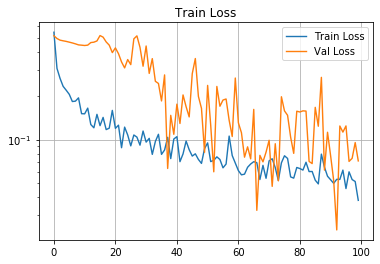


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



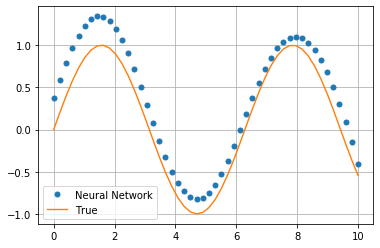

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__
import numpy as np
import pdb
import matplotlib.pyplot as plt

############## Create Training and Test Set ##############
num_samples = 1000
mean, std = 0, 0.1
low, high = 0, 10

X = np.random.uniform(low,high,(num_samples,1))
noise = np.random.normal(mean,std,(num_samples,1))
Y = np.sin(X) + noise

train_split = 0.8
test_split = 1-train_split

num_train, num_test = int(len(X)*train_split), int(len(X)*test_split)

X_train = X[0:num_train]
X_test = X[-num_test:]

Y_train = Y[0:num_train]
Y_test = Y[-num_test:]

plt.figure()
plt.plot(X_train,Y_train,'.',markersize=5)
plt.grid(True)
plt.show()

############################################################

############## Define Neural Network Class ##############
class neural_net(tf.keras.Model):
    def __init__(self, regularization = 1e-6): #You can choose to have more input here! E.g. number of neurons.
        super(neural_net, self).__init__()

        #Define l2 regularization.
        self.regularization = regularization
        regu = tf.keras.regularizers.l2(self.regularization)

        #Define Layers
        self.dense1 = tf.keras.layers.Dense(16,activation='sigmoid',use_bias=True,kernel_regularizer = regu)
        self.batch_norm1 = tf.keras.layers.BatchNormalization()
        self.dense2 = tf.keras.layers.Dense(16, activation='sigmoid', use_bias=True,kernel_regularizer = regu)
        self.batch_norm2 = tf.keras.layers.BatchNormalization()
        self.dense3 = tf.keras.layers.Dense(16, activation='sigmoid', use_bias=True,kernel_regularizer = regu)
        self.batch_norm3 = tf.keras.layers.BatchNormalization()
        self.dense4 = tf.keras.layers.Dense(1, activation='linear', use_bias=True,kernel_regularizer = regu)

    #Define the forward propagation
    def call(self, inputs):

        x = self.dense1(inputs)
        x = self.batch_norm1(x)
        x = self.dense2(x)
        x = self.batch_norm2(x)
        x = self.dense3(x)
        x = self.batch_norm3(x)
        x = self.dense4(x)

        return x

#Create an instance of you neural network model
model = neural_net(regularization=1e-6)

#Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

#Define loss function
mse_loss_fn = tf.keras.losses.MeanSquaredError()

#Compile model
model.compile(optimizer = optimizer, loss=mse_loss_fn)

#Train model
history = model.fit(X_train,Y_train, epochs = 100,validation_split=0.1)
train_loss, val_loss = history.history['loss'], history.history['val_loss']

#Evaluate on test set
test_loss = model.evaluate(X_test,Y_test)
print('Test Loss: ' + str(test_loss))


#Plot test and validation loss
plt.figure()
plt.semilogy(train_loss,linewidth = 1.4)
plt.semilogy(val_loss,linewidth = 1.4)
plt.legend(['Train Loss', 'Val Loss'])
plt.grid(True)
plt.title('Train Loss')
plt.show()


#Plot predictions and compare with true model
x_vec = np.linspace(0,10,50)
x_vec = np.reshape(x_vec,(50,1))

y_vec = np.sin(x_vec)
pred = model(x_vec)
plt.figure()
plt.plot(x_vec,pred,'.',markersize = 10,linewidth = 1.4)
plt.plot(x_vec,y_vec,'-',markersize = 10,linewidth = 1.4)
plt.grid(True)
plt.legend(['Neural Network', 'True'])
plt.show()